In [ ]:
"""
    Ho va Ten: Bui Thi Thanh Xuan
    MSSV: 19110522
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.spatial import distance
import random

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/ML-2022/Lab05/data.csv")
df.head()

,x1,x2
0,-6.111197,1.471531
1,-7.496654,0.913425
2,-10.844898,-7.553523
3,-4.543377,-2.135686
4,-1.913821,-0.034780


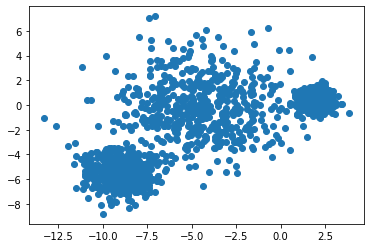

In [ ]:
X = df[["x1", "x2"]].values
plt.scatter(X[:,0], X[:,1])

In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

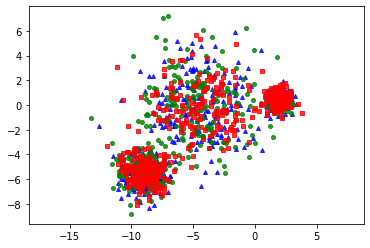

In [ ]:
original_label = np.asarray([0]*500 + [1]*500 + [2]*500).T
kmeans_display(X, original_label)

In [ ]:
def euclidean_dist(X,centroids):
    return distance.cdist(X, centroids, 'euclidean')

In [ ]:
def update_new_centroid(X,new_labels,K):
    return np.array([X[new_labels == k].mean(axis=0) for k in range(K)])

In [ ]:
def total_wcv(X,label,centroids,K):
    WCVs = [np.sum(np.linalg.norm(X[label == k] - centroids[k],axis=1)**2) for k in range(K)]
    return np.sum(WCVs)

In [ ]:
def has_converge(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [ ]:
def Kmeans_Clustering(X,K):

    #Convert data to numpy array 
    if type(X) != np.ndarray:
        X = X.to_numpy()

    # randomly pick k rows of X as initial centers
    k_initial = np.random.choice(len(X), 3 ,replace = False)
    centroids = [X[k_initial,:]]
    label = []
    it = 0
    while 1:
        
        Dist = euclidean_dist(X,centroids[-1]) #Calculate euclidean_distance
        new_labels = np.argmin(Dist,axis=1)   #assign new labels
        label.append(new_labels)

        #Update centroids
        new_centroids = update_new_centroid(X,new_labels,K)
        #Check converge
        if has_converge(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    WCV = total_wcv(X,label[-1],centroids[-1],K)
    return centroids,label,it,WCV


Centers found by our algorithm:
[[ 1.6400471   0.44241664]
 [-4.90914469  0.11313436]
 [-8.87177269 -5.36630437]]
Sum of squared distances of samples to their closest cluster center:  5747.987366346274


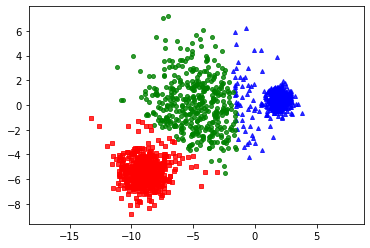

In [ ]:
centers, labels,it,WCV = Kmeans_Clustering(X, 3)
print('Centers found by our algorithm:')
print(centers[-1])
print("Sum of squared distances of samples to their closest cluster center: ", WCV)
kmeans_display(X,labels[-1])

Sum of squared distances of samples to their closest cluster center:  5747.987366346273
Centers found by scikit-learn:
[[-8.87177269 -5.36630437]
 [ 1.6400471   0.44241664]
 [-4.90914469  0.11313436]]


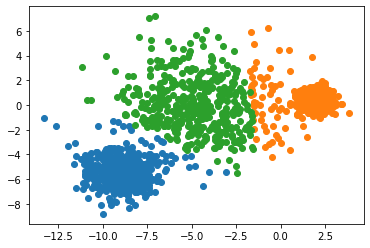

In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3).fit(X)
clusters = kmean.predict(X)
for ii in range(3):
    plt.scatter(X[:,0][clusters==ii], X[:,1][clusters==ii])
print("Sum of squared distances of samples to their closest cluster center: ", kmean.inertia_)
print('Centers found by scikit-learn:')
print(kmean.cluster_centers_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


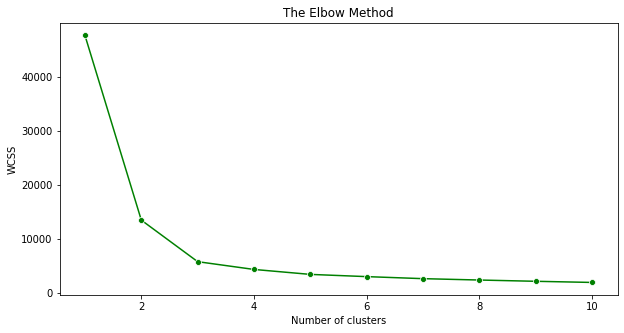

In [ ]:
import seaborn as sns
# to store WCSS
wcss = []

# for loop 
for i in range(1, 11):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
# importing the matplotlib module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()